<a href="https://colab.research.google.com/github/darishkhan/Deep_Learning_Lab/blob/main/Assignment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

#Seperation of training and testing data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#Flattening RGB images to a vector

In [ ]:
flattened_x_train = x_train.reshape(50000, 3072)
flattened_x_test = x_test.reshape(10000, 3072)
print(flattened_x_train.shape)
print(flattened_x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


#KNN with Euclidean norm for k = [3, 4, 9, 20, 47]
Only 25000 training data is used so as to manage training time.

*Less training data compromises accuracy*

In [ ]:
def knn_with_euclidean(data_point, k, training_data):
  distances = []
  for i in range(len(training_data)):
    distance = np.linalg.norm(data_point - training_data[i])
    distances.append((distance, y_train[i][0]))
  distances.sort()
  neighbors=distances
  pred = []

  ans=[]
  j=0
  count=[];
  for i in range(10):
    count.append(0)

  for i in range(len(neighbors)):
    if(i==k[j]):
      pred.append(count.copy())
      j+=1
    if(j>=len(k)):
      break;
    count[neighbors[i][1]]+=1
  for i in range(len(k)):
    ans.append(pred[i].index(max(pred[i])))
  return ans

In [ ]:
k=[3, 4, 9, 20, 47]
countk = []
for i in range(len(k)):
  countk.append(0)

for i in range(10000):
  pred = knn_with_euclidean(flattened_x_test[i], k, flattened_x_train[:25000])
  for j in range(len(pred)):
    if(pred[j]==y_test[i]):
      countk[j]+=1
  if((i+1)%1000==0):
    print(f'Testing done for {i+1} images')

Testing done for 1000 images
Testing done for 2000 images
Testing done for 3000 images
Testing done for 4000 images
Testing done for 5000 images
Testing done for 6000 images
Testing done for 7000 images
Testing done for 8000 images
Testing done for 9000 images
Testing done for 10000 images


In [ ]:
print(f'\n accuracy while using euclidean distance : ')
for j in range(len(k)):
  count = countk[j]
  print(f'Accuracy for k = {k[j]} : ', count/100)


 accuracy while using euclidean distance : 
Accuracy for k = 3 :  21.34
Accuracy for k = 4 :  22.11
Accuracy for k = 9 :  22.98
Accuracy for k = 20 :  23.28
Accuracy for k = 47 :  22.45


#KNN with manhattan distance for k = [3, 4, 9, 20, 47]
Training data further reduced to 10000 because of high training time.

In [ ]:
def knn_with_manhattan(data_point, k, training_data):
  distances = []
  for i in range(len(training_data)):
    distance = np.linalg.norm(np.array(data_point) - np.array(training_data[i]), 1)
    distances.append((distance, y_train[i][0]))
  distances.sort()
  neighbors=distances
  pred = []

  ans=[]
  j=0
  count=[];
  for i in range(10):
    count.append(0)

  for i in range(len(neighbors)):
    if(i==k[j]):
      pred.append(count.copy())
      j+=1
    if(j>=len(k)):
      break;
    count[neighbors[i][1]]+=1
  for i in range(len(k)):
    ans.append(pred[i].index(max(pred[i])))
  return ans

In [ ]:
k=[3, 4, 9, 20, 47]
countkm = []
for i in range(len(k)):
  countkm.append(0)

for i in range(10000):
  pred = knn_with_manhattan(flattened_x_test[i], k, flattened_x_train[:25000])
  for j in range(len(pred)):
    if(pred[j]==y_test[i]):
      countkm[j]+=1
  if((i+1)%1000==0):
    print(f'Testing done for {i+1} images')



Testing done for 1000 images
Testing done for 2000 images
Testing done for 3000 images
Testing done for 4000 images
Testing done for 5000 images
Testing done for 6000 images
Testing done for 7000 images
Testing done for 8000 images
Testing done for 9000 images
Testing done for 10000 images


In [ ]:
print(f'\n accuracy while using manhattan distance : ')
for j in range(len(k)):
  count = countkm[j]
  print(f'Accuracy for k = {k[j]} : ', count/100)


 accuracy while using manhattan distance : 
Accuracy for k = 3 :  25.29
Accuracy for k = 4 :  25.49
Accuracy for k = 9 :  26.85
Accuracy for k = 20 :  27.25
Accuracy for k = 47 :  26.55


#KNN with Minkowski distance with k = [3, 4, 9, 20, 47]

In [ ]:
def knn_with_minkowski(data_point, k, training_data):
  distances = []
  for i in range(len(training_data)):
    distance = np.linalg.norm(np.array(data_point) - np.array(training_data[i]), 3)
    distances.append((distance, y_train[i][0]))
  distances.sort()
  neighbors=distances
  pred = []

  ans=[]
  j=0
  count=[];
  for i in range(10):
    count.append(0)

  for i in range(len(neighbors)):
    if(i==k[j]):
      pred.append(count.copy())
      j+=1
    if(j>=len(k)):
      break;
    count[neighbors[i][1]]+=1
  for i in range(len(k)):
    ans.append(pred[i].index(max(pred[i])))
  return ans

In [ ]:
k=[3, 4, 9, 20, 47]
countkmi = []
for i in range(len(k)):
  countkmi.append(0)

for i in range(1000):
  pred = knn_with_minkowski(flattened_x_test[i], k, flattened_x_train[:25000])
  for j in range(len(pred)):
    if(pred[j]==y_test[i]):
      countkmi[j]+=1
  if((i+1)%100==0):
    print(f'Testing done for {i+1} images')



Testing done for 100 images
Testing done for 200 images
Testing done for 300 images
Testing done for 400 images
Testing done for 500 images
Testing done for 600 images
Testing done for 700 images
Testing done for 800 images
Testing done for 900 images
Testing done for 1000 images


In [ ]:
print(f'\n accuracy while using minkowski distance : ')
for j in range(len(k)):
  count = countkmi[j]
  print(f'Accuracy for k = {k[j]} : ', count/10)


 accuracy while using minkowski distance : 
Accuracy for k = 3 :  19.9
Accuracy for k = 4 :  20.3
Accuracy for k = 9 :  22.0
Accuracy for k = 20 :  22.1
Accuracy for k = 47 :  20.4


#KNN with cosine similarity metric for k = [3, 4, 9, 20, 47]

In [ ]:
def cosine_similarity(x, y):
  return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
def knn_with_cosine_similarity(data_point, k, training_data):
  distances = []
  for i in range(len(training_data)):
    distance = cosine_similarity(data_point, training_data[i])
    distances.append((distance, y_train[i][0]))
  distances.sort()
  neighbors=distances
  pred = []

  ans=[]
  j=0
  count=[];
  for i in range(10):
    count.append(0)

  for i in range(len(neighbors)):
    if(i==k[j]):
      pred.append(count.copy())
      j+=1
    if(j>=len(k)):
      break;
    count[neighbors[i][1]]+=1
  for i in range(len(k)):
    ans.append(pred[i].index(max(pred[i])))
  return ans

In [ ]:
k=[3, 4, 9, 20, 47]
countkc = []
for i in range(len(k)):
  countkc.append(0)

for i in range(5000):
  pred = knn_with_cosine_similarity(flattened_x_test[i], k, flattened_x_train[:25000])
  for j in range(len(pred)):
    if(pred[j]==y_test[i]):
      countkc[j]+=1
  if((i+1)%100==0):
    print(f'Testing done for {i+1} images')



Testing done for 100 images
Testing done for 200 images
Testing done for 300 images
Testing done for 400 images
Testing done for 500 images
Testing done for 600 images
Testing done for 700 images
Testing done for 800 images
Testing done for 900 images
Testing done for 1000 images
Testing done for 1100 images
Testing done for 1200 images
Testing done for 1300 images
Testing done for 1400 images
Testing done for 1500 images
Testing done for 1600 images
Testing done for 1700 images
Testing done for 1800 images
Testing done for 1900 images
Testing done for 2000 images
Testing done for 2100 images
Testing done for 2200 images
Testing done for 2300 images
Testing done for 2400 images
Testing done for 2500 images
Testing done for 2600 images
Testing done for 2700 images
Testing done for 2800 images
Testing done for 2900 images
Testing done for 3000 images
Testing done for 3100 images
Testing done for 3200 images
Testing done for 3300 images
Testing done for 3400 images
Testing done for 3500 i

In [ ]:
print(f'\n accuracy while using cosine similarity metric : ')
for j in range(len(k)):
  count = countkc[j]
  print(f'Accuracy for k = {k[j]} : ', count/50)


 accuracy while using cosine similarity metric : 
Accuracy for k = 3 :  9.74
Accuracy for k = 4 :  9.74
Accuracy for k = 9 :  9.66
Accuracy for k = 20 :  9.66
Accuracy for k = 47 :  9.74


#KNN with hamming distance for k = [3, 4, 9, 20, 47]

In [ ]:
def hamming_distance(x, y):
  z = x-y
  return len(z) - np.count_nonzero(z)

In [ ]:
def knn_with_hamming(data_point, k, training_data):
  distances = []
  for i in range(len(training_data)):
    distance = hamming_distance(np.array(data_point), np.array(training_data[i]))
    distances.append((distance, y_train[i][0]))
  distances.sort()
  neighbors=distances
  pred = []

  ans=[]
  j=0
  count=[];
  for i in range(10):
    count.append(0)

  for i in range(len(neighbors)):
    if(i==k[j]):
      pred.append(count.copy())
      j+=1
    if(j>=len(k)):
      break;
    count[neighbors[i][1]]+=1
  for i in range(len(k)):
    ans.append(pred[i].index(max(pred[i])))
  return ans

In [ ]:
k=[3, 4, 9, 20, 47]
countkh = []
for i in range(len(k)):
  countkh.append(0)

for i in range(10000):
  pred = knn_with_hamming(flattened_x_test[i], k, flattened_x_train[:25000])
  for j in range(len(pred)):
    if(pred[j]==y_test[i]):
      countkh[j]+=1
  if((i+1)%100==0):
    print(f'Testing done for {i+1} images')



Testing done for 100 images
Testing done for 200 images
Testing done for 300 images
Testing done for 400 images
Testing done for 500 images
Testing done for 600 images
Testing done for 700 images
Testing done for 800 images
Testing done for 900 images
Testing done for 1000 images
Testing done for 1100 images
Testing done for 1200 images
Testing done for 1300 images
Testing done for 1400 images
Testing done for 1500 images
Testing done for 1600 images
Testing done for 1700 images
Testing done for 1800 images
Testing done for 1900 images
Testing done for 2000 images
Testing done for 2100 images
Testing done for 2200 images
Testing done for 2300 images
Testing done for 2400 images
Testing done for 2500 images
Testing done for 2600 images
Testing done for 2700 images
Testing done for 2800 images
Testing done for 2900 images
Testing done for 3000 images
Testing done for 3100 images
Testing done for 3200 images
Testing done for 3300 images
Testing done for 3400 images
Testing done for 3500 i

In [ ]:
print(f'\n accuracy while using hamming distance : ')
for j in range(len(k)):
  count = countkh[j]
  print(f'Accuracy for k = {k[j]} : ', count/100)


 accuracy while using hamming distance : 
Accuracy for k = 3 :  10.15
Accuracy for k = 4 :  10.16
Accuracy for k = 9 :  10.13
Accuracy for k = 20 :  9.9
Accuracy for k = 47 :  9.57


#Plot of Accuracy v/s K

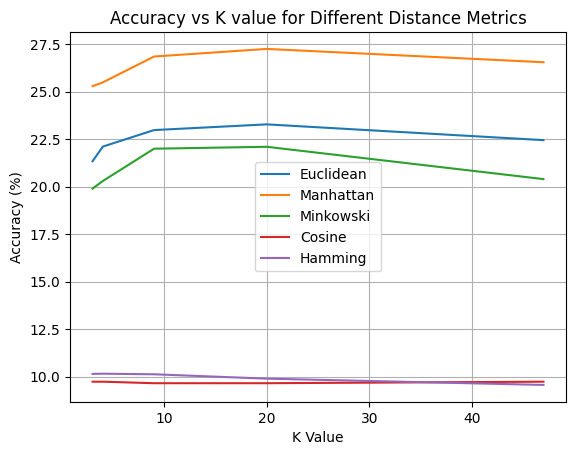

In [ ]:
import matplotlib.pyplot as plt

k_values = [3, 4, 9, 20, 47]

euclidean_accuracies = countk
manhattan_accuracies = countkm
minkowski_accuracies = countkmi
cosine_accuracies = countkc
hamming_accuracies = countkh

for i in range(len(k)):
  euclidean_accuracies[i] = euclidean_accuracies[i] / 100
  manhattan_accuracies[i] = manhattan_accuracies[i] / 100
  minkowski_accuracies[i] = minkowski_accuracies[i] / 10
  cosine_accuracies[i] = cosine_accuracies[i] / 50
  hamming_accuracies[i] = hamming_accuracies[i] / 100

plt.plot(k_values, euclidean_accuracies, label='Euclidean')
plt.plot(k_values, manhattan_accuracies, label='Manhattan')
plt.plot(k_values, minkowski_accuracies, label='Minkowski')
plt.plot(k_values, cosine_accuracies, label='Cosine')
plt.plot(k_values, hamming_accuracies, label='Hamming')

plt.xlabel('K Value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs K value for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()


#Inferences
We get the best accuracy with Manhattan distance metric for k=20.

Thus, let's see the confusion matrix, accuracy, precision and recall for the same.

In [ ]:
confusion_matrix = np.zeros((10, 10), dtype=int)
for i in range(10000):
  pred = knn_with_manhattan(flattened_x_test[i], [20], flattened_x_train[:25000])
  confusion_matrix[y_test[i][0]][pred[0]]+=1
  if((i+1)%1000==0):
    print(f'Testing done for {i+1} images')


Testing done for 1000 images
Testing done for 2000 images
Testing done for 3000 images
Testing done for 4000 images
Testing done for 5000 images
Testing done for 6000 images
Testing done for 7000 images
Testing done for 8000 images
Testing done for 9000 images
Testing done for 10000 images


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix)

print("accuracy: ", np.trace(confusion_matrix)/np.sum(confusion_matrix))

print("precision: ")
for i in range(10):
  sum=0
  for j in range(10):
    sum+=confusion_matrix[j][i]
  print(confusion_matrix[i][i]/sum)

print("recall: ")
for i in range(10):
  print(confusion_matrix[i][i]/np.sum(confusion_matrix[i]))

Confusion Matrix:
[[560   5 123  14  71   3  16   7 197   4]
 [349 137 138  54 103  14  65  11  99  30]
 [228   7 371  42 230  20  56   7  37   2]
 [195  10 207 156 192  48 118  27  41   6]
 [139   9 318  43 383   6  56  21  25   0]
 [133  21 231 138 195 108 107  23  35   9]
 [200   5 291  81 175  17 204  10  16   1]
 [184  21 204  77 242  17  43 144  49  19]
 [196  32  78  28  85  10  32   5 526   8]
 [289  63 132 118  60  22  38  13 129 136]]
accuracy:  0.2725
precision: 
0.22644561261625556
0.44193548387096776
0.17725752508361203
0.20772303595206393
0.2206221198156682
0.4075471698113208
0.27755102040816326
0.5373134328358209
0.4558058925476603
0.6325581395348837
recall: 
0.56
0.137
0.371
0.156
0.383
0.108
0.204
0.144
0.526
0.136
